In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [45]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/SBI_Life_insurance.csv')
            

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [14]:
df.tail()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,3,0,1,10600.5483,0
1334,18,0,31.92,0,0,0,2205.9808,1
1335,18,0,36.85,0,0,2,1629.8335,1
1336,21,0,25.80,0,0,3,2007.9450,0
1337,61,0,29.07,0,1,1,29141.3603,1


In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [30]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [31]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [18]:
# Finding missing values
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [19]:
# No Null Values present

Text(0.5, 1.0, 'claim per gender')

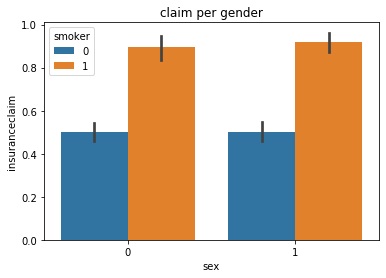

In [32]:
# relation between sex and smoker and insuranceclaim
sns.barplot(x='sex',y='insuranceclaim',hue='smoker',data=df).set_title('claim per gender')

Text(0.5, 1.0, 'claim vs smoker')

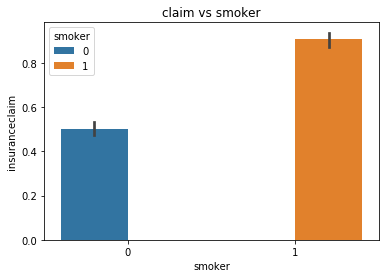

In [34]:
sns.barplot(x='smoker',y='insuranceclaim',hue='smoker',data=df).set_title('claim vs smoker')

Text(0.5, 1.0, 'claim vs smoker')

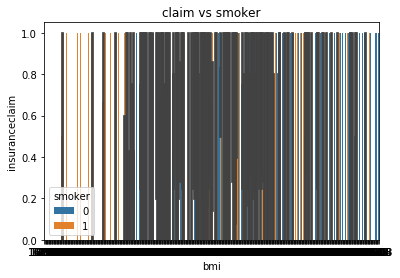

In [35]:
sns.barplot(x='bmi',y='insuranceclaim',hue='smoker',data=df).set_title('claim vs smoker')

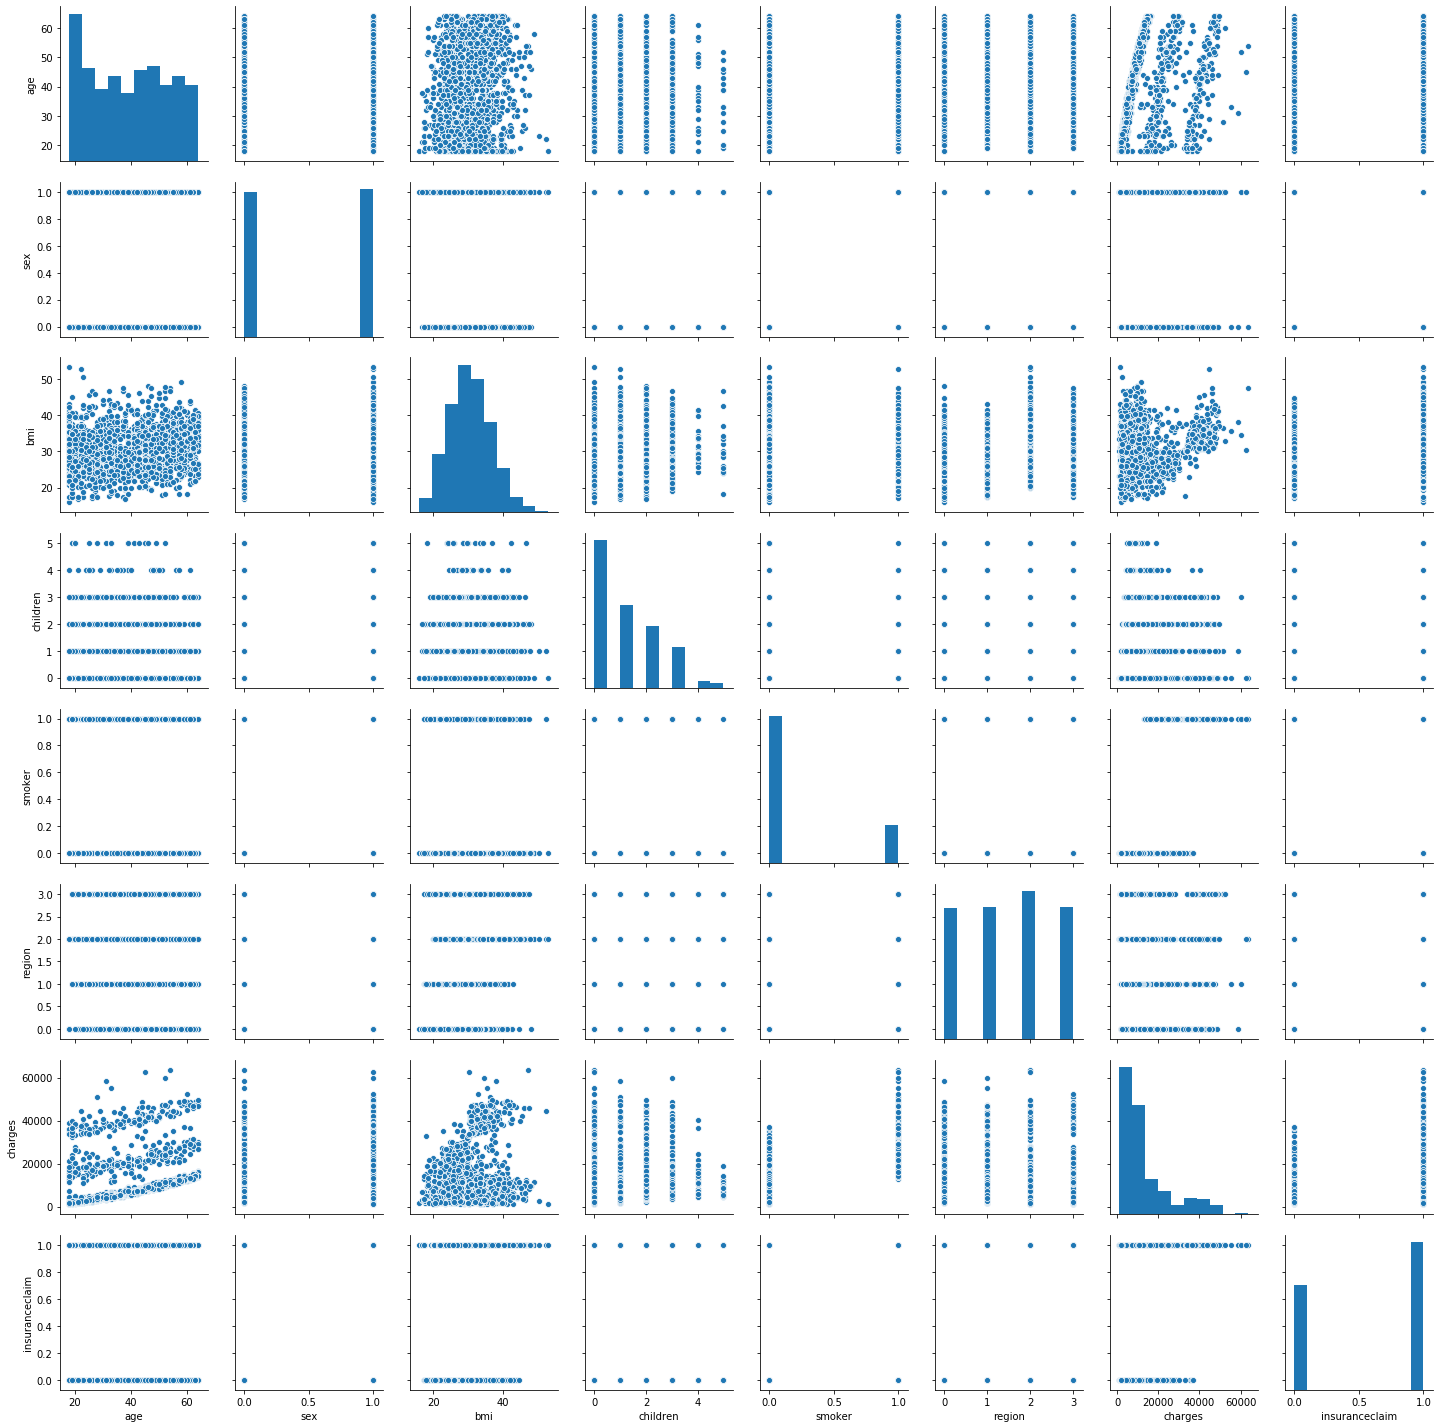

In [28]:
sns.pairplot(df)

In [46]:
bins = [-1, 0, 5, 12, 18, 24, 35, 60, 100]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior Citizen']
df['AgeGroup'] = pd.cut(df['age'], bins, labels = labels)

Text(0.5, 1.0, 'claim vs smoker')

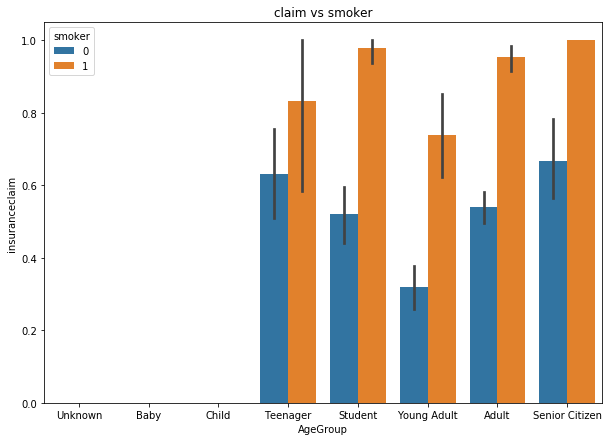

In [40]:
plt.figure(figsize=(10,7))
sns.barplot(x='AgeGroup',y='insuranceclaim',hue='smoker',data=df).set_title('claim vs smoker')

Text(0.5, 1.0, 'claim vs agegroup')

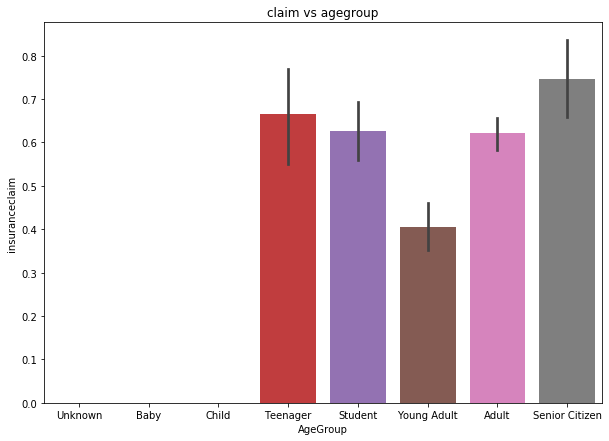

In [41]:
plt.figure(figsize=(10,7))
sns.barplot(x='AgeGroup',y='insuranceclaim',data=df).set_title('claim vs agegroup')
# majority of claim by seniorcitizen however there is not much relation between age and claim

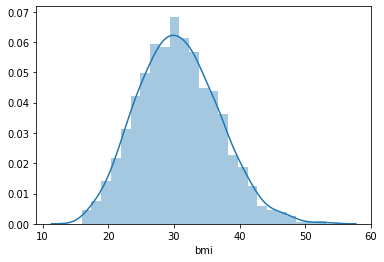

In [43]:
sns.distplot(df['bmi'])

In [47]:
bins = [10,20,30,40,50,60]
labels = ['less', 'good', 'bad', 'very bad','worst']
df['bmi_group'] = pd.cut(df['bmi'], bins, labels = labels)

Text(0.5, 1.0, 'claim vs bmi')

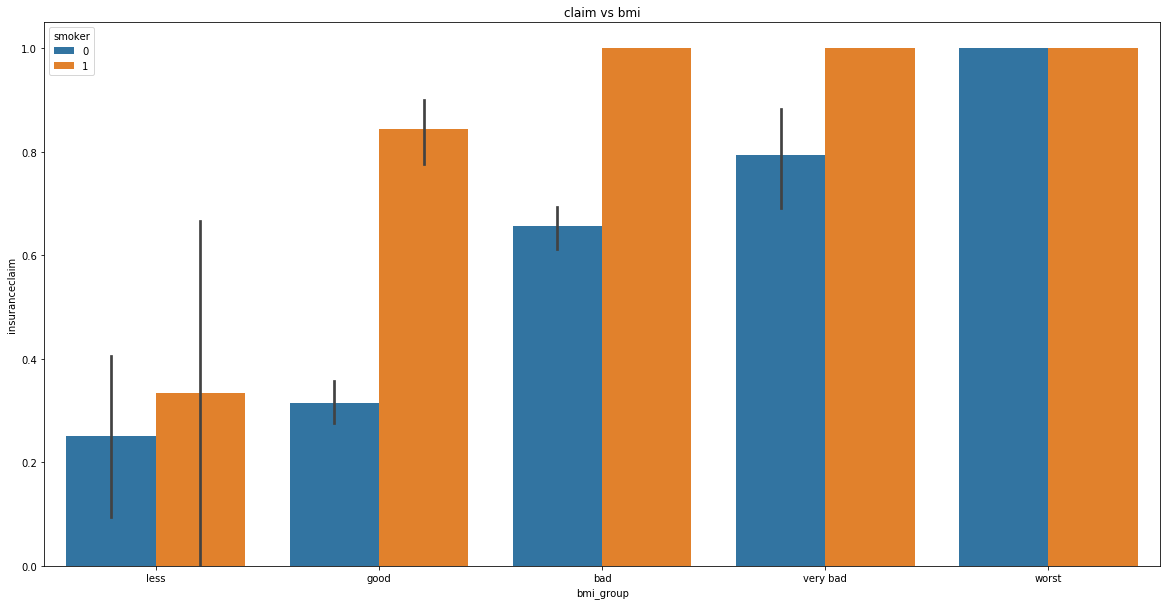

In [55]:
plt.figure(figsize=(20,10))
sns.barplot(x='bmi_group',y='insuranceclaim',hue='smoker',data=df).set_title('claim vs bmi')

Text(0.5, 1.0, 'claim vs bmi')

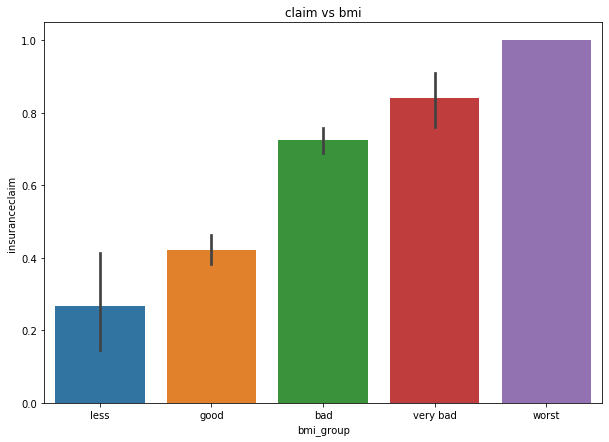

In [56]:
plt.figure(figsize=(10,7))
sns.barplot(x='bmi_group',y='insuranceclaim',data=df).set_title('claim vs bmi')

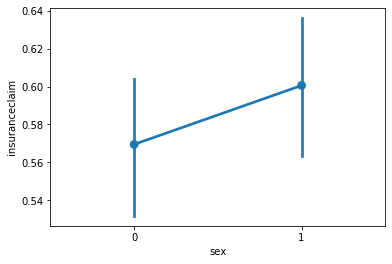

In [66]:
sns.pointplot(x='sex',y='insuranceclaim',data=df)

In [64]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim,AgeGroup,bmi_group
0,19,0,27.900,0,1,3,16884.92400,1,Student,good
1,18,1,33.770,1,0,2,1725.55230,1,Teenager,bad
2,28,1,33.000,3,0,2,4449.46200,0,Young Adult,bad
3,33,1,22.705,0,0,1,21984.47061,0,Young Adult,good
4,32,1,28.880,0,0,1,3866.85520,1,Young Adult,good


In [61]:
# Checking collinearity
dfcor=df.corr()

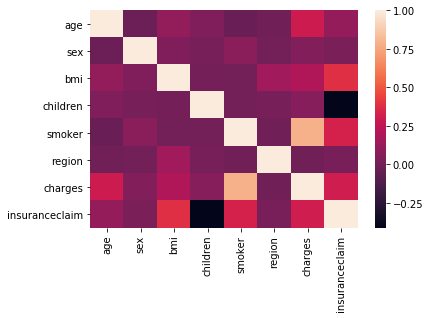

In [62]:
sns.heatmap(dfcor)

In [73]:
dfcor


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


In [74]:
df=df.drop(['AgeGroup','bmi_group'],axis=1)

In [75]:
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


In [76]:
# Finding outliers
from scipy.stats import zscore
z=np.abs(zscore(df))

In [77]:
df_new=df[(z<3).all(axis=1)]

In [78]:
df.shape

(1338, 8)

In [80]:
df_new.shape

(1309, 8)

In [81]:
df_new.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [85]:
y=df_new[['insuranceclaim']]

In [86]:
x=df_new.drop(columns=['insuranceclaim'])

In [87]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [88]:
y.columns

Index(['insuranceclaim'], dtype='object')

In [89]:
# Finding Best model
lg=LogisticRegression()
max_accuracy_score=0

In [90]:
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    ac_scr=accuracy_score(y_test,pred)
    print('accuracy score corresponding to random state',r_state," is ",ac_scr)
    if ac_scr>max_accuracy_score:
        max_accuracy_score=ac_scr
        final_r_state=r_state
        

print('max accuracy score corresponding to ', final_r_state," is ",max_accuracy_score)

accuracy score corresponding to random state 42  is  0.8091603053435115
accuracy score corresponding to random state 43  is  0.7862595419847328
accuracy score corresponding to random state 44  is  0.8396946564885496
accuracy score corresponding to random state 45  is  0.7824427480916031
accuracy score corresponding to random state 46  is  0.8053435114503816
accuracy score corresponding to random state 47  is  0.8053435114503816
accuracy score corresponding to random state 48  is  0.7748091603053435
accuracy score corresponding to random state 49  is  0.8320610687022901
accuracy score corresponding to random state 50  is  0.8129770992366412
accuracy score corresponding to random state 51  is  0.7709923664122137
accuracy score corresponding to random state 52  is  0.7519083969465649
accuracy score corresponding to random state 53  is  0.7977099236641222
accuracy score corresponding to random state 54  is  0.8244274809160306
accuracy score corresponding to random state 55  is  0.839694656

In [91]:
#Logistic Regression model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=43)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
acc_log=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

0.7862595419847328
[[ 74  36]
 [ 20 132]]


In [92]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
DT=DecisionTreeClassifier()
GNB=GaussianNB()

In [93]:
#GaussianNB 
GNB.fit(x_train,y_train)
predgnb=GNB.predict(x_test)
acc_gaussian=accuracy_score(y_test,predgnb)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))

0.7938931297709924
[[ 95  15]
 [ 39 113]]


In [94]:
# SVC Model
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
predsv=svc.predict(x_test)
acc_svc=accuracy_score(y_test,predsv)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(predsv,y_test))

0.5992366412213741
[[  7   2]
 [103 150]]


In [95]:
# KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
acc_knn=accuracy_score(y_test,predknn)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(predknn,y_test))

0.648854961832061
[[ 54  36]
 [ 56 116]]


In [97]:
# Decision Tree
DT.fit(x_train,y_train)
preddct=DT.predict(x_test)
acc_decision_tree=accuracy_score(y_test,preddct)
print(acc_decision_tree)
print(confusion_matrix(preddct,y_test))

0.9389312977099237
[[104  10]
 [  6 142]]


In [98]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Naive Bayes','Decision Tree'],
    'Score': [acc_svc,acc_knn,acc_log,acc_gaussian,acc_decision_tree]})

In [99]:
results

,Model,Score
0,Support Vector Machines,0.599237
1,KNN,0.648855
2,Logistic Regression,0.786260
3,Naive Bayes,0.793893
4,Decision Tree,0.938931


In [100]:
GNB_score=cross_val_score(GNB,x_train,y_train,cv=5).mean()
lg_score=cross_val_score(lg,x_train,y_train,cv=5).mean()
KNN_score=cross_val_score(KNN,x_train,y_train,cv=5).mean()
DT_score=cross_val_score(DT,x_train,y_train,cv=5).mean()
GNB_score=cross_val_score(GNB,x_train,y_train,cv=5).mean()
print(GNB_score,lg_score,KNN_score,DT_score,GNB_score)

0.7955781310233793 0.7984489444205083 0.5836005351595274 0.9733236581328375 0.7955781310233793


In [101]:
# Best model is Decision Tree

In [102]:
from sklearn.externals import joblib

In [103]:
joblib.dump(DT,'insurance_claimed.csv')

['insurance_claimed.csv']